<a href="https://colab.research.google.com/github/BoBroccoli/ML/blob/main/c2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print(type(housing["longitude"]))
print(type(housing[["longitude"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


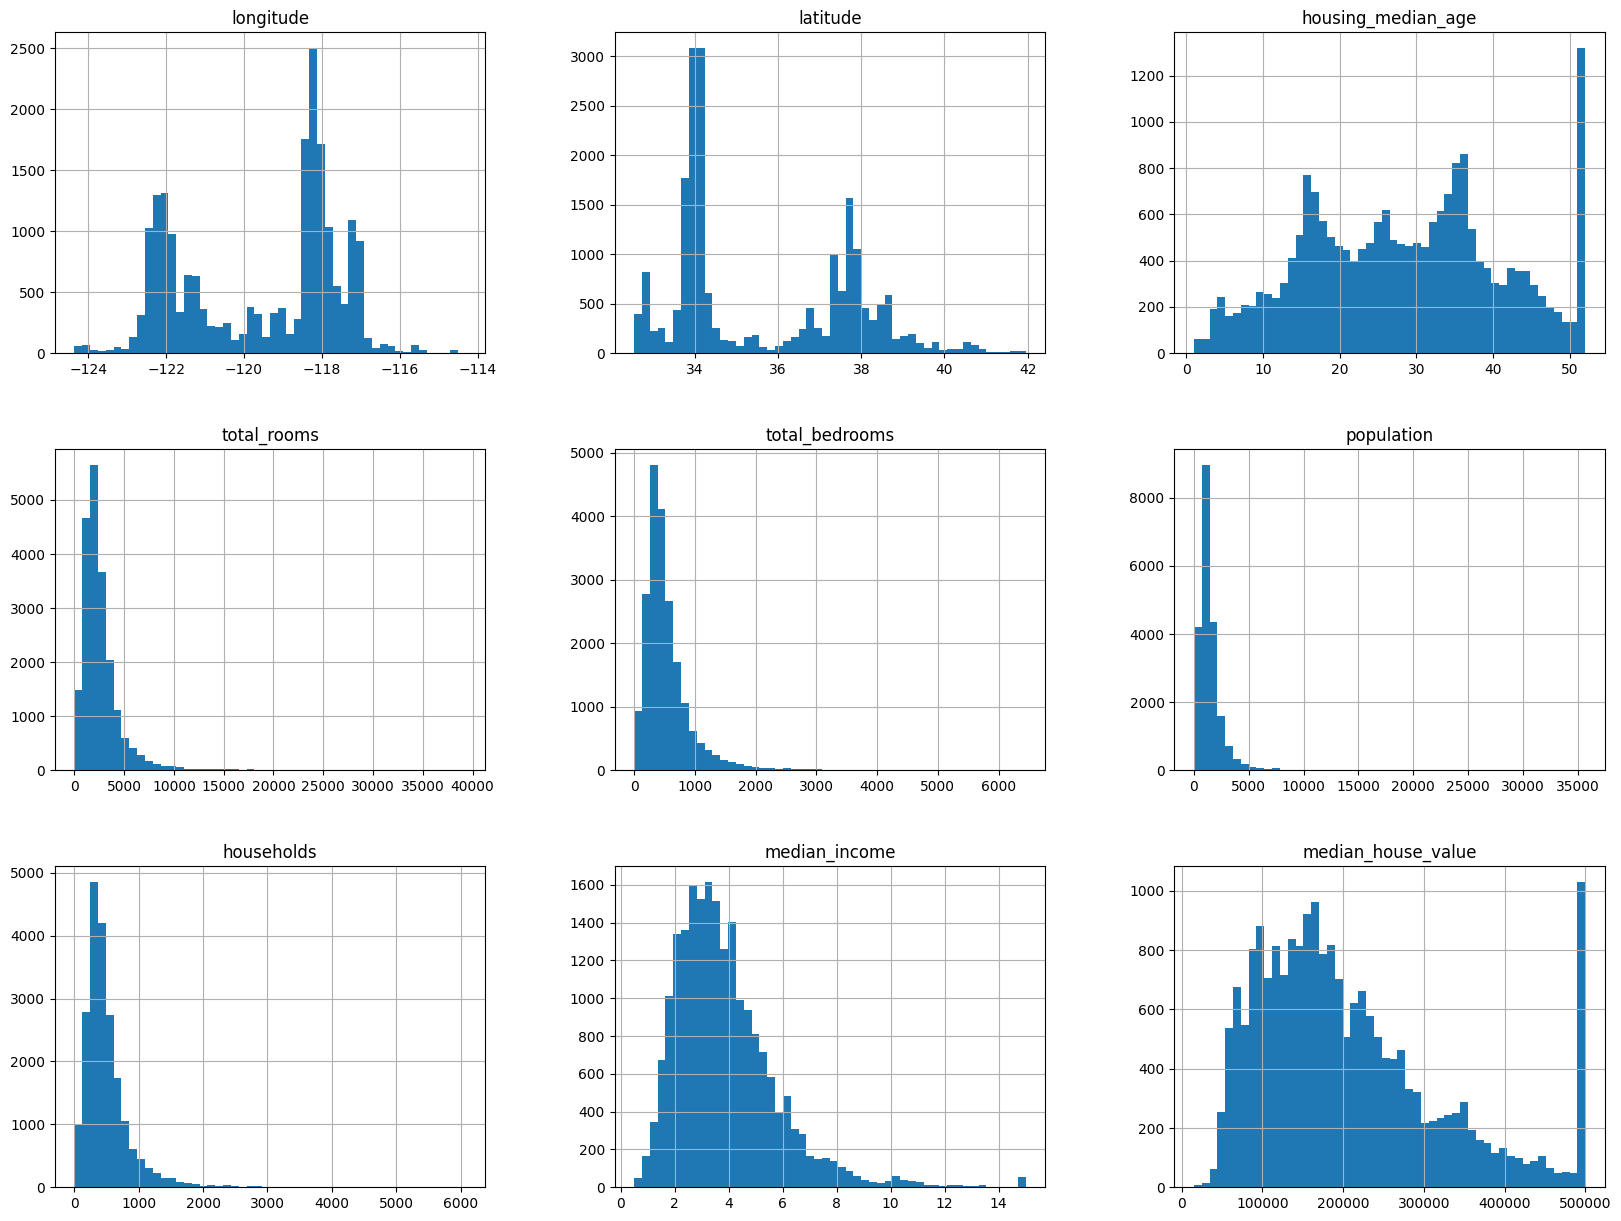

In [ ]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
#run multiple times
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    print(shuffled_indices)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

[3962 4739  729 ... 2620 8199 6430]
Rows in train set: 16512
Rows in test set: 4128


In [ ]:
np.random.seed(42)

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    print(shuffled_indices)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

[20046  3024 15663 ...  5390   860 15795]
Rows in train set: 16512
Rows in test set: 4128


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 16512
Rows in test set: 4128


In [ ]:
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 16512
Rows in test set: 4128


<Axes: >

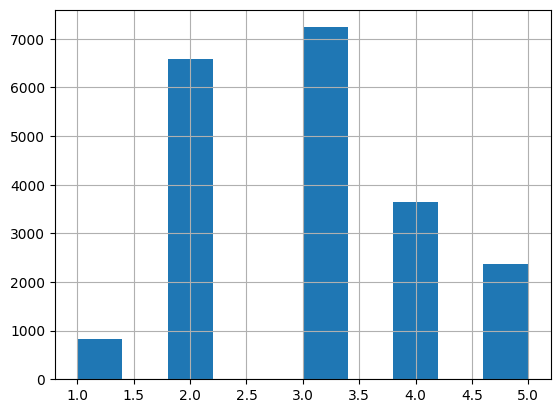

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.iloc[train_index]
  strat_test_set = housing.iloc[test_index]
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

# strat_train_set, strat_test_set = train_test_split(
#     housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
# strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

<ipython-input-12-73860b7e7a7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
<ipython-input-12-73860b7e7a7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
total_bedrooms = housing[["total_bedrooms"]]
total_bedrooms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bedrooms  16344 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(total_bedrooms)
total_bedrooms_slice = imputer.transform(total_bedrooms)
total_bedrooms = pd.DataFrame(total_bedrooms_slice, columns=total_bedrooms.columns, index=total_bedrooms.index)
total_bedrooms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bedrooms  16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


array([[<Axes: title={'center': 'total_bedrooms'}>]], dtype=object)

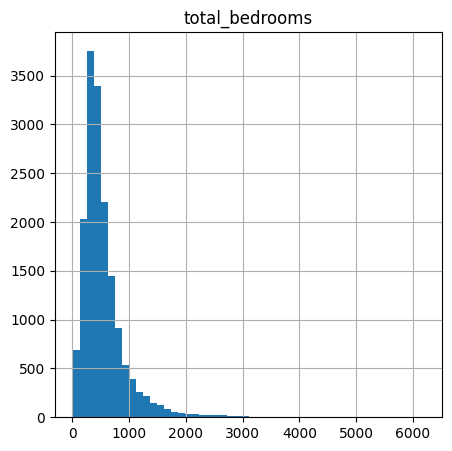

In [ ]:
total_bedrooms.hist(bins=50, figsize=(5, 5))

array([[<Axes: title={'center': 'total_bedrooms'}>]], dtype=object)

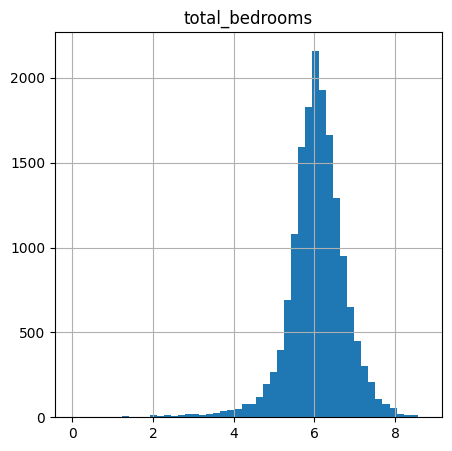

In [ ]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
total_bedrooms_log = FunctionTransformer(np.log, inverse_func=np.exp).fit_transform(total_bedrooms)
total_bedrooms = pd.DataFrame(total_bedrooms_log, columns=total_bedrooms.columns, index=total_bedrooms.index)
total_bedrooms.hist(bins=50, figsize=(5, 5))

,total_bedrooms
13096,1.324114
14973,-0.252671
3785,-0.925266
14689,0.952773
20507,1.437622


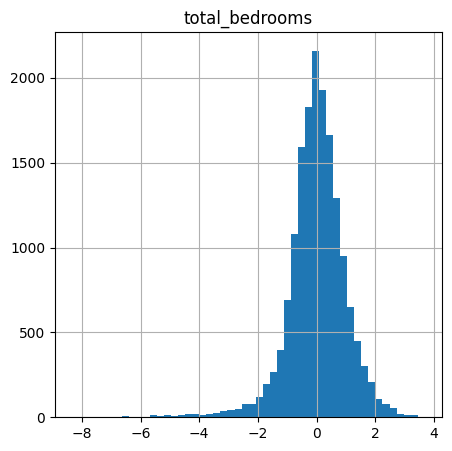

In [ ]:
total_bedrooms_standard = StandardScaler().fit_transform(total_bedrooms)
total_bedrooms = pd.DataFrame(total_bedrooms_standard, columns=total_bedrooms.columns, index=total_bedrooms.index)
total_bedrooms.hist(bins=50, figsize=(5, 5))
total_bedrooms.head()

,total_bedrooms
13096,1.324114
14973,-0.252671
3785,-0.925266
14689,0.952773
20507,1.437622


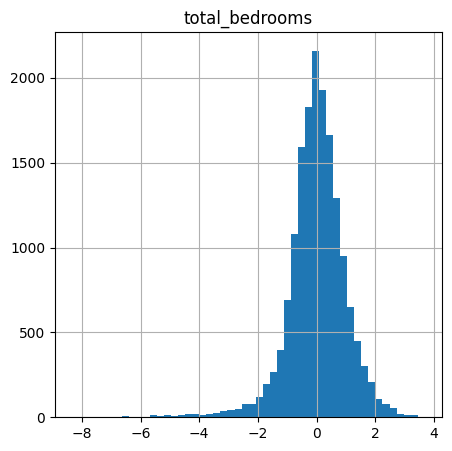

In [ ]:
from sklearn.pipeline import make_pipeline
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

total_bedrooms = log_pipeline.fit_transform(housing[["total_bedrooms"]])
total_bedrooms = pd.DataFrame(total_bedrooms, columns=housing[["total_bedrooms"]].columns, index=housing.index)
total_bedrooms.hist(bins=50, figsize=(5, 5))
total_bedrooms.head()

,0
13096,-0.866027
14973,0.024550
3785,-0.041193
14689,-0.034858
20507,-0.666554


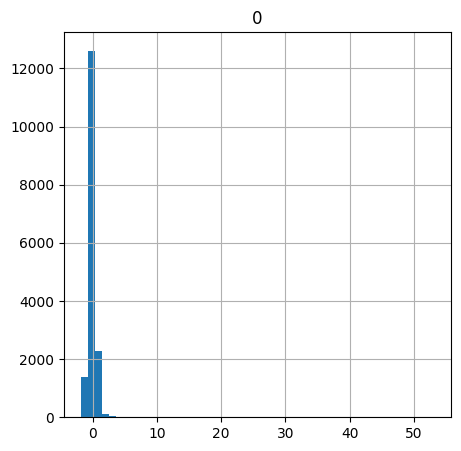

In [ ]:
def ratio_name(function_transformer, feature_names_in):
  return ["ratio"]
ratio_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]], feature_names_out=ratio_name),
    StandardScaler()
)
rooms_per_household_slices = ratio_pipeline.fit_transform(housing[["total_rooms", "households"]])
rooms_per_household = pd.DataFrame(rooms_per_household_slices, index=housing.index)
rooms_per_household.hist(bins=50, figsize=(5, 5))
rooms_per_household.head()

In [ ]:
print(housing["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: count, dtype: int64


In [ ]:
# <1H OCEAN  1
# INLAND     2
# NEAR OCEAN 3
# ...

from sklearn.preprocessing import OneHotEncoder
housing_cat = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder()
)
housing_cat_slice = housing_cat.fit_transform(housing[["ocean_proximity"]])
housing_cat_slice.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


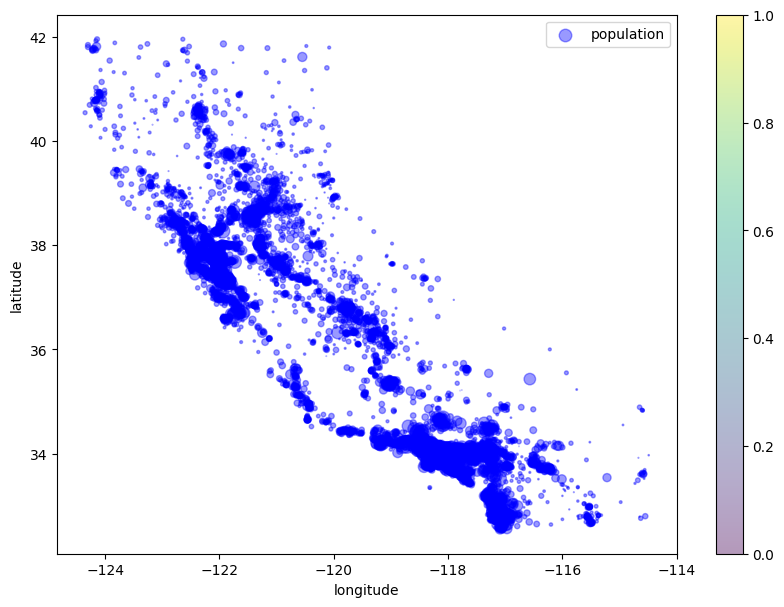

In [ ]:
from matplotlib import pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
      s=housing["population"]/100, label="population", figsize=(10,7),
      c="blue", cmap=plt.get_cmap("jet"), colorbar=True,
  )
plt.legend()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

geo_cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = geo_cluster_simil.fit_transform(housing[["latitude", "longitude"]])
similarities[:10].round(2)

array([[0.  , 0.97, 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.13, 0.57],
       [0.12, 0.  , 0.98, 0.03, 0.  , 0.  , 0.  , 0.54, 0.  , 0.  ],
       [0.  , 0.75, 0.  , 0.  , 0.  , 0.44, 0.  , 0.  , 0.27, 0.28],
       [0.  , 0.  , 0.24, 0.5 , 0.  , 0.  , 0.  , 0.74, 0.  , 0.  ],
       [0.03, 0.  , 0.91, 0.11, 0.  , 0.  , 0.  , 0.75, 0.  , 0.  ],
       [0.  , 0.36, 0.  , 0.  , 0.01, 0.39, 0.  , 0.  , 0.88, 0.41],
       [0.07, 0.  , 0.95, 0.06, 0.  , 0.  , 0.  , 0.59, 0.  , 0.  ],
       [0.  , 0.73, 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.24, 0.93],
       [0.17, 0.  , 0.91, 0.02, 0.  , 0.  , 0.  , 0.45, 0.  , 0.  ],
       [0.05, 0.  , 0.98, 0.07, 0.  , 0.  , 0.  , 0.76, 0.  , 0.  ]])

In [ ]:
similarities_df = pd.DataFrame(similarities, columns=geo_cluster_simil.get_feature_names_out(), index=housing.index).round(2)
similarities_df.head()

,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity
13096,0.00,0.97,0.00,0.00,0.0,0.08,0.0,0.00,0.13,0.57
14973,0.12,0.00,0.98,0.03,0.0,0.00,0.0,0.54,0.00,0.00
3785,0.00,0.75,0.00,0.00,0.0,0.44,0.0,0.00,0.27,0.28
14689,0.00,0.00,0.24,0.50,0.0,0.00,0.0,0.74,0.00,0.00
20507,0.03,0.00,0.91,0.11,0.0,0.00,0.0,0.75,0.00,0.00


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline, ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline, ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline, ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                            "households", "median_income"]),
    ("geo", geo_cluster_simil, ["latitude", "longitude"]),
    ("cat", housing_cat, ["ocean_proximity"])
]
,remainder=default_num_pipeline
)
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared_tr = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)
print(housing_prepared_tr.head())

       bedrooms__ratio  rooms_per_house__ratio  people_per_house__ratio  \
13096         1.846624               -0.866027                -0.330204   
14973        -0.508121                0.024550                -0.253616   
3785         -0.202155               -0.041193                -0.051041   
14689        -0.149006               -0.034858                -0.141475   
20507         0.963208               -0.666554                -0.306148   

       log__total_bedrooms  log__total_rooms  log__population  \
13096             1.324114          0.637892         0.456906   
14973            -0.252671         -0.063576        -0.711654   
3785             -0.925266         -0.859927        -0.941997   
14689             0.952773          0.943475         0.670700   
20507             1.437622          1.003590         0.719093   

       log__households  log__median_income  geo__Cluster 0 similarity  \
13096         1.310369           -1.071522               8.708837e-08   
14973       